In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option("display.width",500)
pd.set_option("display.expand_frame_repr",False)

In [2]:
movies = pd.read_csv(r"C:\Users\anate\Desktop\Codemoviesmetadata.csv")
ratings = pd.read_csv(r"C:\Users\anate\Desktop\Codeatings.csv")



C:\Users\91628\AppData\Local\Temp\ipykernel_11980\3331442477.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv(r"C:\Users\91628\Desktop\AI Project\files\moviesmetadata.csv")


In [3]:
# Check column names
print(movies.columns)

# Display DataFrame
print(movies)



Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'], dtype='object')


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [4]:
# Handle missing values
# For movies dataset
movies.dropna(inplace=True)  # Drop rows with any missing values
# For ratings dataset
ratings.dropna(inplace=True)  # Drop rows with any missing values


In [5]:
# Identify non-numeric values in the 'id' column
non_numeric_values = movies['id'][~movies['id'].str.isdigit()]
print(non_numeric_values)

# Handle non-numeric values (e.g., replace them with NaN)
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')

# Drop rows with NaN values in the 'id' column
movies.dropna(subset=['id'], inplace=True)

# Convert the 'id' column to integers
movies['id'] = movies['id'].astype('int64')

# Now you can proceed with the merge
df = movies.merge(ratings, how="left", left_on="id", right_on="movieId")


Series([], Name: id, dtype: object)


In [6]:
movies.rename(columns={'id': 'movieId'}, inplace=True)

# Merge the DataFrames
df = movies.merge(ratings, how="left", on="movieId")
df.head()

,adult,belongs_to_collection,budget,genres,homepage,movieId,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,userId,rating,timestamp
0,FALSE,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,619.0,3.0,8.316091e+08
1,FALSE,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,1932.0,2.0,1.186725e+09
2,FALSE,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,2073.0,4.0,8.600079e+08
3,FALSE,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,2260.0,3.0,8.545674e+08
4,FALSE,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,2680.0,3.0,8.690613e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806280 entries, 0 to 806279
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   adult                  806280 non-null  object 
 1   belongs_to_collection  806280 non-null  object 
 2   budget                 806280 non-null  object 
 3   genres                 806280 non-null  object 
 4   homepage               806280 non-null  object 
 5   movieId                806280 non-null  int64  
 6   imdb_id                806280 non-null  object 
 7   original_language      806280 non-null  object 
 8   original_title         806280 non-null  object 
 9   overview               806280 non-null  object 
 10  popularity             806280 non-null  object 
 11  poster_path            806280 non-null  object 
 12  production_companies   806280 non-null  object 
 13  production_countries   806280 non-null  object 
 14  release_date           806280 non-nu

In [8]:
df.describe()

,movieId,revenue,runtime,vote_average,vote_count,userId,rating,timestamp
count,806280.000000,8.062800e+05,806280.000000,806280.000000,806280.000000,805797.000000,805797.000000,8.057970e+05
mean,2134.095802,3.277767e+08,112.763876,6.731049,2789.669439,135231.971251,3.517221,1.056644e+09
std,8108.091341,2.768415e+08,21.321263,0.786206,2128.032593,78063.681596,1.040724,1.975353e+08
min,11.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.500000,8.228736e+08
25%,253.000000,9.760745e+07,100.000000,6.200000,858.000000,67734.000000,3.000000,8.609438e+08
50%,608.000000,2.885002e+08,116.000000,6.600000,2737.000000,135733.000000,3.500000,1.001549e+09
75%,1250.000000,4.418188e+08,125.000000,7.400000,3991.000000,202780.000000,4.000000,1.190620e+09
max,426580.000000,2.787965e+09,476.000000,8.500000,12269.000000,270896.000000,5.000000,1.501823e+09


In [9]:
df.count()

adult                    806280
belongs_to_collection    806280
budget                   806280
genres                   806280
homepage                 806280
movieId                  806280
imdb_id                  806280
original_language        806280
original_title           806280
overview                 806280
popularity               806280
poster_path              806280
production_companies     806280
production_countries     806280
release_date             806280
revenue                  806280
runtime                  806280
spoken_languages         806280
status                   806280
tagline                  806280
title                    806280
video                    806280
vote_average             806280
vote_count               806280
userId                   805797
rating                   805797
timestamp                805797
dtype: int64

In [10]:
cleaned_df = df.dropna()

In [11]:
cleaned_df.count()

adult                    805797
belongs_to_collection    805797
budget                   805797
genres                   805797
homepage                 805797
movieId                  805797
imdb_id                  805797
original_language        805797
original_title           805797
overview                 805797
popularity               805797
poster_path              805797
production_companies     805797
production_countries     805797
release_date             805797
revenue                  805797
runtime                  805797
spoken_languages         805797
status                   805797
tagline                  805797
title                    805797
video                    805797
vote_average             805797
vote_count               805797
userId                   805797
rating                   805797
timestamp                805797
dtype: int64

In [13]:
# Directory path where you want to save the file
directory_path = r"C:\Users\91628\Desktop\AI Project\files"

# File name
output_file = "cleaned_dataset.csv"

# Concatenate directory path with file name
output_path = directory_path + "\\" + output_file

# Save the DataFrame to the specified path
cleaned_df.to_csv(output_path, index=False)

print("Cleaned DataFrame saved to CSV file successfully.")


Cleaned DataFrame saved to CSV file successfully.


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015808 entries, 0 to 2015807
Data columns (total 26 columns):
 #   Column                Dtype  
---  ------                -----  
 0   adult                 bool   
 1   budget                int64  
 2   genres                object 
 3   homepage              object 
 4   movieId               int64  
 5   imdb_id               object 
 6   original_language     object 
 7   original_title        object 
 8   overview              object 
 9   popularity            float64
 10  poster_path           object 
 11  production_companies  object 
 12  production_countries  object 
 13  release_date          object 
 14  revenue               float64
 15  runtime               float64
 16  spoken_languages      object 
 17  status                object 
 18  tagline               object 
 19  title                 object 
 20  video                 bool   
 21  vote_average          float64
 22  vote_count            float6

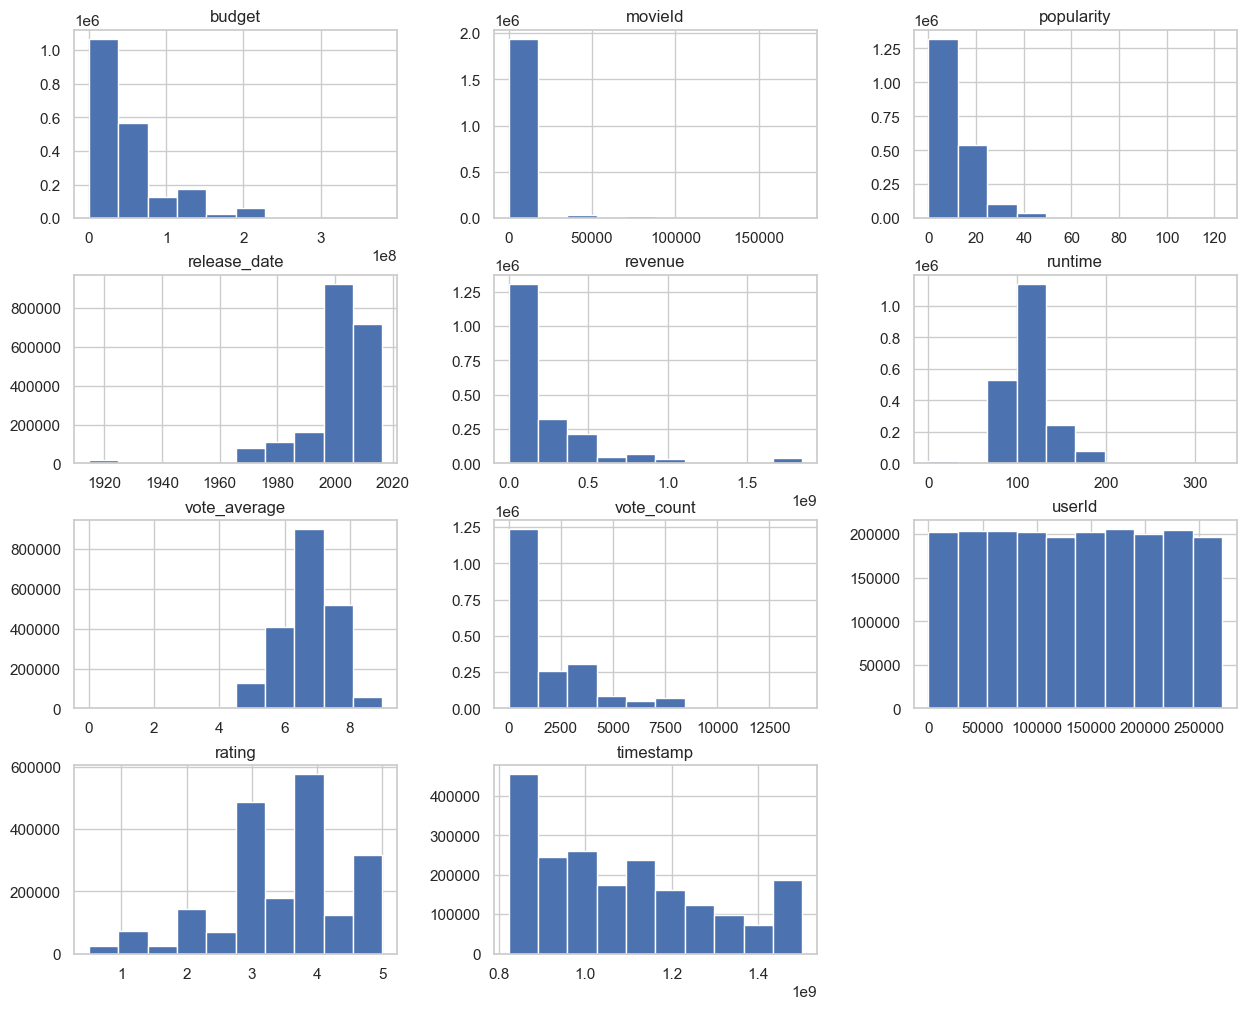

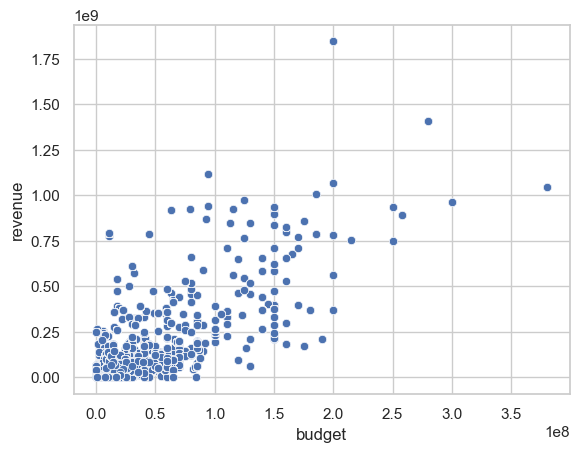

C:\Users\shuba\AppData\Local\Temp\ipykernel_4668\2334496375.py:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cleaned_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


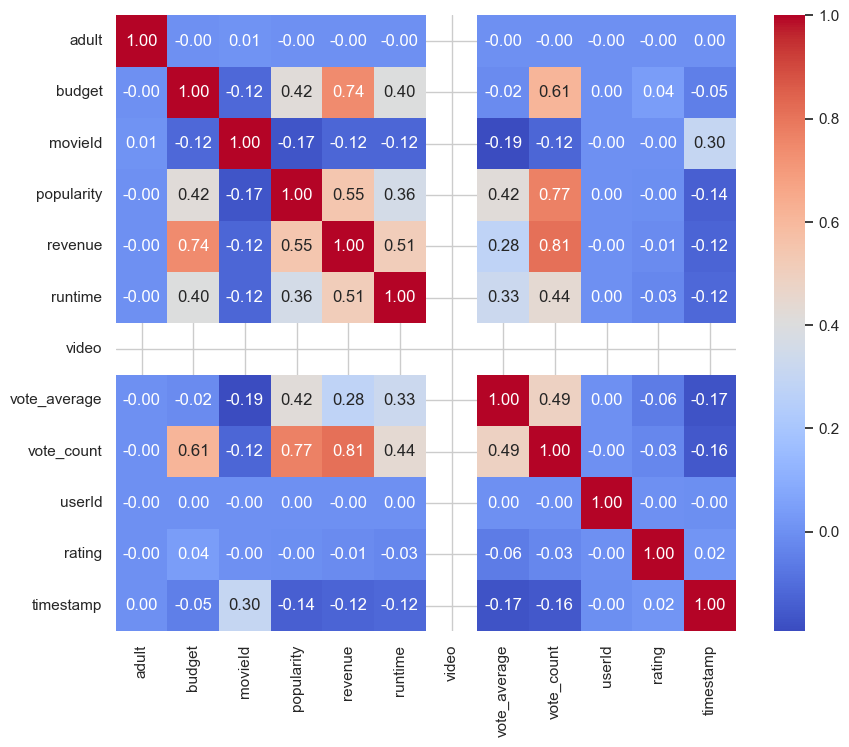

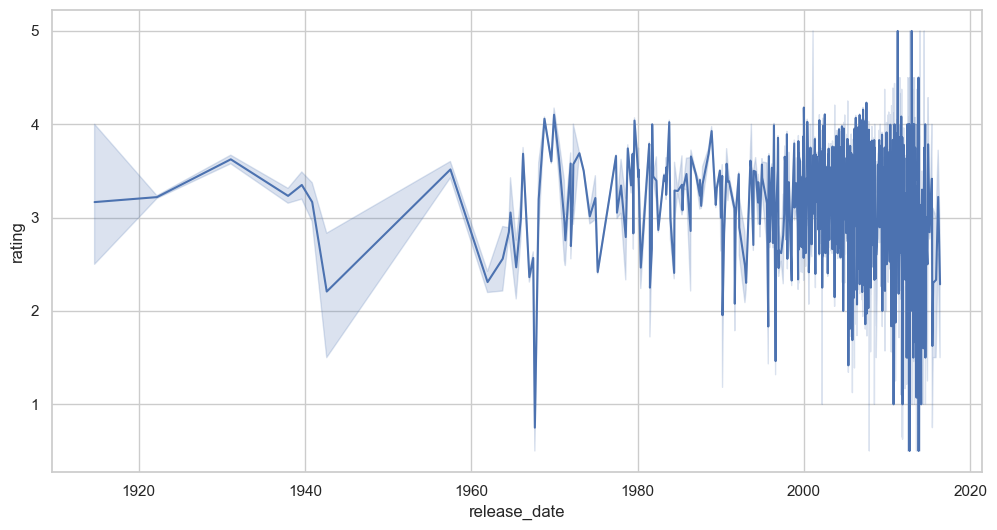

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
cleaned_df = pd.read_csv('cleaned_dataset.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(cleaned_df.info())

# Summary statistics for numerical variables
print("\nSummary Statistics for Numerical Variables:")
print(cleaned_df.describe())

# Correct data types if necessary (convert 'release_date' to datetime)
cleaned_df['release_date'] = pd.to_datetime(cleaned_df['release_date'])

# Summary statistics for categorical variables
print("\nSummary Statistics for Categorical Variables:")
print(cleaned_df.describe(include=['object']))

# Univariate Analysis
# Histogram of numerical variables
cleaned_df.hist(figsize=(15, 12))
plt.show()

# Step 4: Bivariate Analysis
# Scatter plot of numerical variables
sns.scatterplot(x='budget', y='revenue', data=cleaned_df)
plt.show()

# Step 5: Multivariate Analysis
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cleaned_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Step 6: Additional Analysis
# Time series plot of rating over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='rating', data=cleaned_df)
plt.show()